# Regresión logistica y algunas cositas más


## Previo al modelo: importación de las librerias y organización de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Esto es para poder ver los axis en los plots usando el dark theme.
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Importo librerias
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

# Importo base de datos
tabla_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv', index_col=0)
df = tabla_df.copy()
#df = df.drop(columns = ['sexo', 'tiene_cable']) #Saco la columna de sexo porque demostramos que no es una variable que nos importe.
df = df.replace('nc', np.nan)
df = df.replace(-1.000, np.nan)
df

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,escuela_id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,tiene_notebook,tiene_pc,tiene_tablet,tiene_celular,tiene_smartphone,tiene_consola,tiene_smarttv,tiene_cable,repeticion_primaria,repeticion_secundaria,nivel_id,year_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,tasa_con_nbi,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,lengua_avanzado,lengua_satisfactorio,lengua_Basico,lengua_Bajo_Basico,sociales_avanzado,sociales_satisfactorio,sociales_Basico,sociales_Bajo_Basico,naturales_avanzado,naturales_satisfactorio,naturales_Basico,naturales_Bajo_Basico,departamento_id,provincia_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
608698.0,540901809,0.0,2.0,satisfactorio,satisfactorio,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,2,2016,0,1,NaN,NaN,2.009901,2.0,0,1.0,1.0,0.0,0.104660,0,0,1,1,0.000000,1.162457,0.0,0.000000,0.000000,1.166861,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
457489.0,1152730019,0.0,1.0,por_debajo_del_basico,basico,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2,2016,0,1,NaN,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.104660,0,0,1,1,0.000000,0.000000,0.0,1.100506,0.000000,0.000000,1.104708,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1563023.0,1145017919,0.0,2.0,NaN,NaN,NaN,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,0,0,0.267,0.0,1.816327,1.0,0,1.0,2.0,0.0,0.104660,1,1,1,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.537383,0.0,0.000000,0.0,0.0
1795162.0,1022298417,0.0,1.0,NaN,NaN,basico,por_debajo_del_basico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,2017,0,0,0.442,1.0,1.865169,1.0,0,0.0,2.0,0.0,0.104660,1,1,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.169184,0.0,0.000000,0.000000,0.0,1.166764,0.0,0.0
508042.0,1152730019,0.0,1.0,satisfactorio,avanzado,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2,2016,0,1,NaN,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.104660,0,0,1,1,0.000000,1.100506,0.0,0.000000,1.104708,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973858.0,25204992428,NaN,2.0,avanzado,satisfactorio,avanzado,avanzado,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,3,2016,0,1,NaN,NaN,2.801980,2.0,0,1.0,1.0,0.0,0.083297,0,0,0,0,1.139511,0.000000,0.0,0.000000,0.000000,1.049554,0.000000,0.0,1.037433,0.0,0.000000,0.0,1.044834,0.000000,0.0,0.000000,250.0,23.0
1060039.0,24302357127,NaN,1.0,por_debajo_del_basico,satisfactorio,avanzado,satisfactorio,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,3,2016,0,1,NaN,NaN,2.615385,2.0,0,1.0,1.0,0.0,0.083297,0,0,0,0,0.000000,0.000000,0.0,1.488929,0.000000,1.457099,0.000000,0.0,1.355550,0.0,0.000000,0.0,0.000000,1.450546,0.0,0.000000,250.0,23.0
1665267.0,27905229731,0.0,2.0,NaN,NaN,avanzado,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,1,1,NaN,NaN,2.166667,2.0,0,1.0,1.0,0.0,0.083297,1,1,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.007280,0.0,0.000000,0.0,0.000000,1.008751,0.0,0.000000,250.0,23.0


Cambio de Bruno: nivel de desempeño en matemática para trabajar con una variable binaria. 

- 0: por debajo del básico y básico. 
- 1: satisfactorio y avanzado. 

Separo los alumnos de secundaria y de primaria en dos data frame distintos. Los guardo en la carpeta 'clean_data'. 

In [ ]:
df_secundario = df.loc[df['nivel_id'] == 3]
df_primario = df.loc[df['nivel_id'] == 2]
#df_secundario.to_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv')
#df_primario.to_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv')

## Modelo de regresión logistica secundario

In [ ]:
replace = {
    'nivel_desemp_matematica':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    },
    'nivel_desemp_lengua':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    },
    'nivel_desemp_ciencias_sociales':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    },
    'nivel_desemp_ciencias_naturales':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    }
}
df.replace(to_replace=replace, value=None, inplace=True)

df_secundario = df.loc[df['nivel_id'] == 3]
df_primario = df.loc[df['nivel_id'] == 2]

### Secundario con NaN

In [ ]:
df_f = df_secundario[df_secundario['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'tiene_smartphone','indice_socioeconomico_medio_cat']]

# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['tiene_smartphone','indice_socioeconomico_medio_cat']]
# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 
X

,tiene_smartphone,indice_socioeconomico_medio_cat
id,,
1037297.0,1.0,1.0
1014085.0,1.0,1.0
67702.0,NaN,1.0
1130145.0,1.0,1.0
218677.0,NaN,2.0
...,...,...
1122927.0,0.0,2.0
111435.0,NaN,2.0
973858.0,1.0,2.0


Hacemos el modelo

In [ ]:
# Escalo todos los datos

escalar = StandardScaler()
#X_train.loc[:,['indice_socioeconomico_medio']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio']])
#X_test.loc[:,['indice_socioeconomico_medio']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio']])

# Modelo
algoritmo = LogisticRegression().fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)
precision = precision_score(Y_test, Y_pred)
precision

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

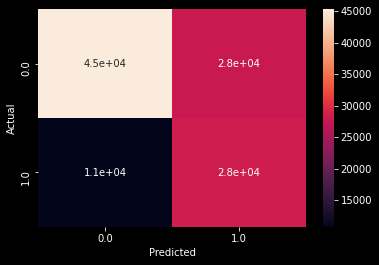

Accuracy:  0.6557031020386352


In [ ]:
# GRAPHS
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
plt.show()
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

### Secundaria sin NaN

In [ ]:
df_f = df_secundario[df_secundario['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'tiene_smartphone', 'indice_socioeconomico_medio']]
df_f = df_f.dropna()
# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['tiene_smartphone', 'indice_socioeconomico_medio']]

# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 

In [ ]:
# Escalo todos los datos

escalar = StandardScaler()
X_train.loc[:,['indice_socioeconomico_medio']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio']])
X_test.loc[:,['indice_socioeconomico_medio']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio']])

# Modelo
algoritmo = LogisticRegression()
algoritmo.fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)
precision = precision_score(Y_test, Y_pred)
precision

In [ ]:
# GRAPHS
plt.hist(Y_pred, color = 'salmon')
plt.title("Predicho")
plt.show()
plt.hist(Y_test, color = 'lightblue')
plt.title("Verdadero")
plt.show()
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
plt.show()
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

# Cosas que no vamos a usar


### Primario con NaN

In [ ]:
df_f = df_primario[df_primario['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 

In [ ]:
#Escalo todos los datos
escalar = StandardScaler()
X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])
X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])

# Modelo
algoritmo = LogisticRegression()
algoritmo.fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)
precision = precision_score(Y_test, Y_pred)
precision

0.6227755957660013

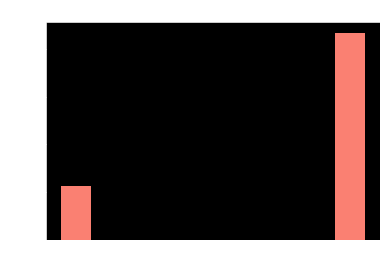

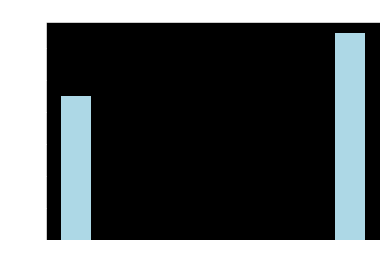

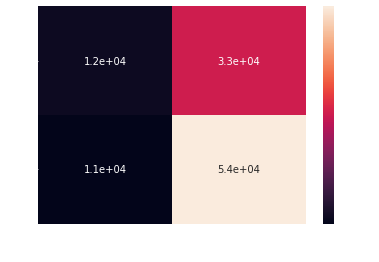

Accuracy:  0.6042454812946616


In [ ]:
# GRAPHS
plt.hist(Y_pred, color = 'salmon')
plt.title("Predicho")
plt.show()
plt.hist(Y_test, color = 'lightblue')
plt.title("Verdadero")
plt.show()
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
plt.show()
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

### Primaria sin NaN

In [ ]:
df_f = df_primario[df_primario['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]
df_f = df_f.dropna()
# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 

In [ ]:
# Escalo todos los datos

escalar = StandardScaler()
X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])
X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])

# Modelo
algoritmo = LogisticRegression()
algoritmo.fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)
precision = precision_score(Y_test, Y_pred)
precision

0.5627703062977665

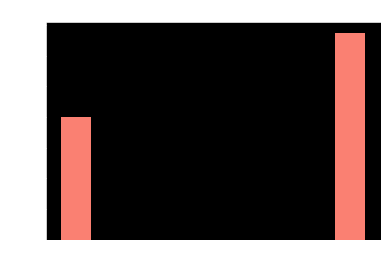

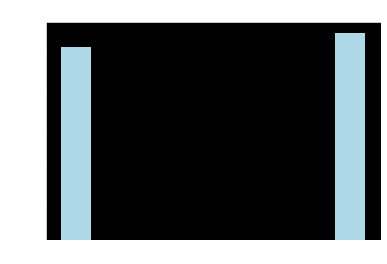

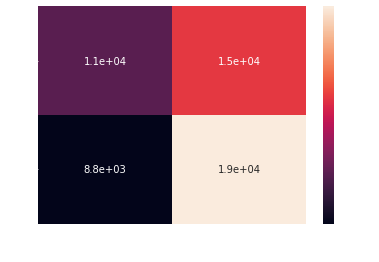

Accuracy:  0.5615150163544455


In [ ]:
# GRAPHS
plt.hist(Y_pred, color = 'salmon')
plt.title("Predicho")
plt.show()
plt.hist(Y_test, color = 'lightblue')
plt.title("Verdadero")
plt.show()
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
plt.show()
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

### Todos con NaN

In [ ]:
df_f = df[df['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 

In [ ]:
# Escalo todos los datos

escalar = StandardScaler()
X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])
X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])

# Modelo
algoritmo = LogisticRegression().fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)
precision = precision_score(Y_test, Y_pred)
precision

0.6234544908380896

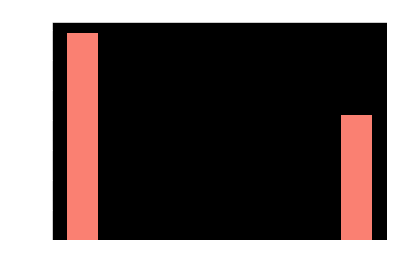

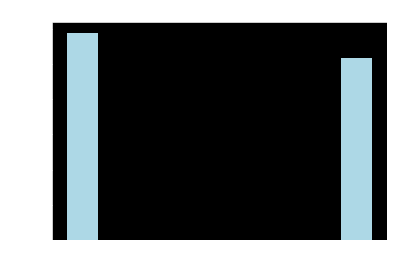

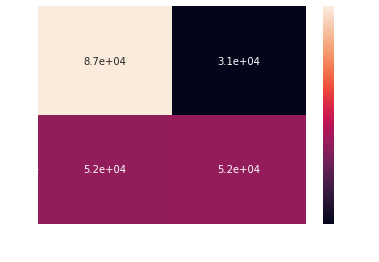

Accuracy:  0.6248410113930559


In [ ]:
# GRAPHS
plt.hist(Y_pred, color = 'salmon')
plt.title("Predicho")
plt.show()
plt.hist(Y_test, color = 'lightblue')
plt.title("Verdadero")
plt.show()
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
plt.show()
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

### Todos sin NaN

In [ ]:
df_f = df[df['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]
df_f = df_f.dropna()
# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 

In [ ]:
# Escalo todos los datos

escalar = StandardScaler()
X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])
X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])

# Modelo
algoritmo = LogisticRegression().fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)
precision = precision_score(Y_test, Y_pred)
precision

0.5828353022932592

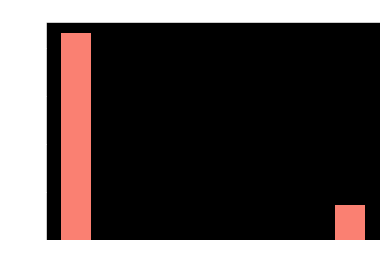

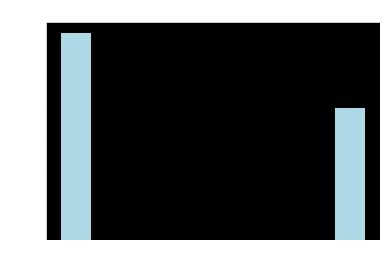

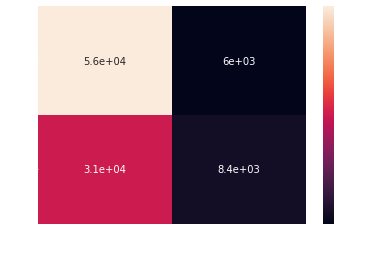

Accuracy:  0.6341526238099484


In [ ]:
# GRAPHS
plt.hist(Y_pred, color = 'salmon')
plt.title("Predicho")
plt.show()
plt.hist(Y_test, color = 'lightblue')
plt.title("Verdadero")
plt.show()
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
plt.show()
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

### En base a otras pruebas

In [ ]:
df_f = df[df['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f[df_f['nivel_desemp_ciencias_naturales'].notna()]
df_f = df_f[df_f['nivel_desemp_ciencias_sociales'].notna()]
df_f = df_f[df_f['nivel_desemp_lengua'].notna()]
df_f = df_f.loc[:, ['nivel_desemp_lengua', 'nivel_desemp_ciencias_sociales', 'nivel_desemp_ciencias_naturales','nivel_desemp_matematica','indice_socioeconomico_medio']]
df_f = df_f.dropna()
# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['nivel_desemp_ciencias_naturales', 'nivel_desemp_ciencias_sociales', 'nivel_desemp_lengua', 'indice_socioeconomico_medio']]

# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 

In [ ]:
# Modelo
algoritmo = LogisticRegression().fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)
precision = precision_score(Y_test, Y_pred)
precision

0.6547364326006614

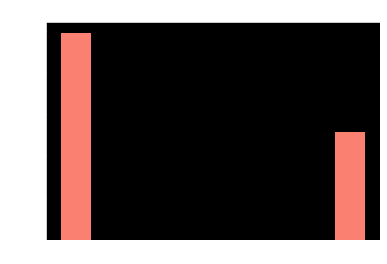

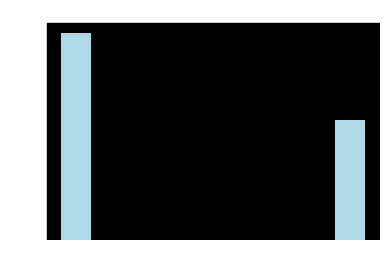

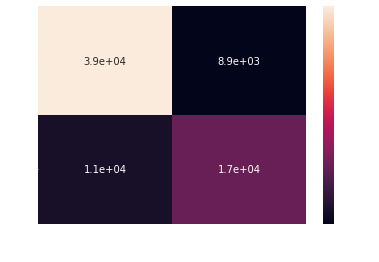

Accuracy:  0.7383736380547435


In [ ]:
# GRAPHS
plt.hist(Y_pred, color = 'salmon')
plt.title("Predicho")
plt.show()
plt.hist(Y_test, color = 'lightblue')
plt.title("Verdadero")
plt.show()
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
plt.show()
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))

## Modelo de regresión logistica multivariada

In [ ]:
df = tabla_df.copy()
df.nivel_desemp_matematica.replace('avanzado', 3, inplace = True)
df.nivel_desemp_matematica.replace('satisfactorio', 2, inplace = True)
df.nivel_desemp_matematica.replace('basico', 1, inplace = True)
df.nivel_desemp_matematica.replace('por_debajo_del_basico', 0, inplace = True)
df_secundario = df.loc[df['nivel_id'] == 3]
df_primario = df.loc[df['nivel_id'] == 2]

### Secundario con NaN

In [ ]:
df_f = df_secundario[df_secundario['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 

In [ ]:
# Escalo todos los datos
escalar = StandardScaler()
X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])
X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])

# Modelo
algoritmo = LogisticRegression(random_state=0,multi_class='multinomial', solver='newton-cg',penalty='none').fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)

In [ ]:
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

### Secundario sin NaN

In [ ]:
df_f = df_secundario[df_secundario['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi','gestion']]
df_f = df_f.dropna()
# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi','gestion']]

# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 

In [ ]:
# Escalo todos los datos
escalar = StandardScaler()
X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])
X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])

# Modelo
algoritmo = LogisticRegression(random_state=0,multi_class='multinomial', solver='newton-cg',penalty='none').fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)

In [ ]:
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

### Primario con NaN

In [ ]:
df_f = df_primario[df_primario['nivel_desemp_matematica'].notna()] # Tomo solamente las filas que no tienen NaN 
df_f = df_f.loc[:, ['nivel_desemp_matematica', 'tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.loc[:, ['tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']]

# Separo datos para el train y el test. 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2) 

# Doy un valor a los NaN
X_train = X_train.replace(np.nan, -1) 
X_test =  X_test.replace(np.nan, -1) 

In [ ]:
# Escalo todos los datos
escalar = StandardScaler()
X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])
X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi']])
df_f = df_f.dropna()
# Modelo
algoritmo = LogisticRegression(random_state=0,multi_class='multinomial', solver='newton-cg',penalty='none').fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)

In [ ]:
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

## Modelo de regresión logistica con UMAP

### Copio la tabla de Bauti

In [ ]:
data = df.copy()
data.head(5)

,escuela_id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,tiene_notebook,tiene_pc,tiene_tablet,tiene_celular,tiene_smartphone,tiene_consola,tiene_smarttv,tiene_cable,repeticion_primaria,repeticion_secundaria,nivel_id,year_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,tasa_con_nbi,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,lengua_avanzado,lengua_satisfactorio,lengua_Basico,lengua_Bajo_Basico,sociales_avanzado,sociales_satisfactorio,sociales_Basico,sociales_Bajo_Basico,naturales_avanzado,naturales_satisfactorio,naturales_Basico,naturales_Bajo_Basico,departamento_id,provincia_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
608698.0,540901809,0.0,2.0,satisfactorio,satisfactorio,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,2,2016,0,1,NaN,NaN,2.009901,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,1.162457,0.0,0.000000,0.000000,1.166861,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
457489.0,1152730019,0.0,1.0,por_debajo_del_basico,basico,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2,2016,0,1,NaN,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,0.000000,0.0,1.100506,0.000000,0.000000,1.104708,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1563023.0,1145017919,0.0,2.0,NaN,NaN,NaN,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,0,0,0.267,0.0,1.816327,1.0,0,1.0,2.0,0.0,0.10466,1,1,1,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.537383,0.0,0.000000,0.0,0.0
1795162.0,1022298417,0.0,1.0,NaN,NaN,basico,por_debajo_del_basico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,2017,0,0,0.442,1.0,1.865169,1.0,0,0.0,2.0,0.0,0.10466,1,1,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.169184,0.0,0.0,0.000000,0.0,1.166764,0.0,0.0
508042.0,1152730019,0.0,1.0,satisfactorio,avanzado,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2,2016,0,1,NaN,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,1.100506,0.0,0.000000,1.104708,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
to_keep = ['nivel_desemp_matematica','nivel_desemp_lengua', 'nivel_desemp_ciencias_sociales', 
           'nivel_desemp_ciencias_naturales', 'mate_nc_na', 'lengua_nc_na', 'sociales_nc_na', 'naturales_nc_na'
]
data = data[to_keep]


In [ ]:
data = pd.merge(data, pd.get_dummies(data.nivel_desemp_lengua, 'lengua'), left_index=True, right_index=True)
data = pd.merge(data, pd.get_dummies(data.nivel_desemp_matematica, 'mate'), left_index=True, right_index=True)
data = pd.merge(data, pd.get_dummies(data.nivel_desemp_ciencias_sociales, 'ciencias_sociales'), left_index=True, right_index=True)
data = pd.merge(data, pd.get_dummies(data.nivel_desemp_ciencias_naturales, 'ciencias_naturales'), left_index=True, right_index=True)
data

,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,lengua_avanzado,lengua_basico,lengua_por_debajo_del_basico,lengua_satisfactorio,mate_avanzado,mate_basico,mate_por_debajo_del_basico,mate_satisfactorio,ciencias_sociales_avanzado,ciencias_sociales_basico,ciencias_sociales_por_debajo_del_basico,ciencias_sociales_satisfactorio,ciencias_naturales_avanzado,ciencias_naturales_basico,ciencias_naturales_por_debajo_del_basico,ciencias_naturales_satisfactorio
id,,,,,,,,,,,,,,,,,,,,,,,,
608698.0,satisfactorio,satisfactorio,NaN,NaN,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
457489.0,por_debajo_del_basico,basico,NaN,NaN,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1563023.0,NaN,NaN,NaN,satisfactorio,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1795162.0,NaN,NaN,basico,por_debajo_del_basico,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
508042.0,satisfactorio,avanzado,NaN,NaN,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973858.0,avanzado,satisfactorio,avanzado,avanzado,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
1060039.0,por_debajo_del_basico,satisfactorio,avanzado,satisfactorio,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
1665267.0,NaN,NaN,avanzado,satisfactorio,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
replace = {
    'nivel_desemp_matematica':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    }
}
data.replace(to_replace=replace, value=None, inplace=True)
data

,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,lengua_avanzado,lengua_basico,lengua_por_debajo_del_basico,lengua_satisfactorio,mate_avanzado,mate_basico,mate_por_debajo_del_basico,mate_satisfactorio,ciencias_sociales_avanzado,ciencias_sociales_basico,ciencias_sociales_por_debajo_del_basico,ciencias_sociales_satisfactorio,ciencias_naturales_avanzado,ciencias_naturales_basico,ciencias_naturales_por_debajo_del_basico,ciencias_naturales_satisfactorio
id,,,,,,,,,,,,,,,,,,,,,,,,
608698.0,1.0,satisfactorio,NaN,NaN,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
457489.0,0.0,basico,NaN,NaN,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1563023.0,NaN,NaN,NaN,satisfactorio,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1795162.0,NaN,NaN,basico,por_debajo_del_basico,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
508042.0,1.0,avanzado,NaN,NaN,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973858.0,1.0,satisfactorio,avanzado,avanzado,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0
1060039.0,0.0,satisfactorio,avanzado,satisfactorio,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
1665267.0,NaN,NaN,avanzado,satisfactorio,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
not_nan = (data.mate_nc_na == 0) # &(df.sociales_nc_na == 0) & (df.lengua_nc_na == 0)& (df.naturales_nc_na == 0)    #ONLY MATE
data = data[not_nan]

to_drop = ['nivel_desemp_lengua', 'nivel_desemp_ciencias_sociales', 
           'nivel_desemp_ciencias_naturales', 'mate_nc_na', 'lengua_nc_na', 'sociales_nc_na', 'naturales_nc_na',
           'mate_por_debajo_del_basico','mate_satisfactorio','mate_avanzado', 'mate_basico'
]

data.drop(columns=to_drop, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data = pd.merge(data, df.loc[:, ['tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi']].copy(), right_index=True, left_index=True)

data.dropna(inplace=True)

In [ ]:
data

,nivel_desemp_matematica,lengua_avanzado,lengua_basico,lengua_por_debajo_del_basico,lengua_satisfactorio,ciencias_sociales_avanzado,ciencias_sociales_basico,ciencias_sociales_por_debajo_del_basico,ciencias_sociales_satisfactorio,ciencias_naturales_avanzado,ciencias_naturales_basico,ciencias_naturales_por_debajo_del_basico,ciencias_naturales_satisfactorio,tiene_internet,indice_socioeconomico_medio,icse,tasa_con_nbi
id,,,,,,,,,,,,,,,,,
423590.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.865169,0.442,0.104660
771805.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.865169,0.442,0.104660
734486.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.666667,0.343,0.104660
1037297.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,1.0,1.938272,0.303,0.104660
833751.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,1.816327,0.267,0.104660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137158.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,1.0,1.711111,0.257,0.083297
383723.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.555556,0.356,0.083297
169388.0,0.0,0,0,0,0,0,0,0,1,0,0,0,1,1.0,1.711111,0.257,0.083297


# Usando datos de UMAP

In [ ]:
# Importo base de datos
umap_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/notas_umap.csv', index_col=0)
umap_df

,notas_umap_x,notas_umap_y
id,,
1037297.0,28.839863,-4.881861
1014085.0,35.898010,-12.223399
67702.0,5.515402,22.261768
1130145.0,30.796263,13.689089
218677.0,19.127071,-18.473919
...,...,...
1122927.0,-15.587843,8.235098
111435.0,22.352936,8.708374
973858.0,10.007269,6.573709


In [ ]:
df_f = pd.merge(umap_df, df.loc[:, ['tiene_internet', 'indice_socioeconomico_medio', 'icse','tasa_con_nbi', 'nivel_desemp_matematica']].copy(), right_index=True, left_index=True)
replace = {
    'nivel_desemp_matematica':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    }
}
df_f.replace(to_replace=replace, value=None, inplace=True)
df_f.dropna(inplace=True)
df_f

,notas_umap_x,notas_umap_y,tiene_internet,indice_socioeconomico_medio,icse,tasa_con_nbi,nivel_desemp_matematica
id,,,,,,,
1037297.0,28.839863,-4.881861,1.0,1.938272,0.303,0.104660,0
1014085.0,35.898010,-12.223399,1.0,1.938272,0.303,0.104660,0
67702.0,5.515402,22.261768,1.0,1.857143,0.111,0.104660,0
1130145.0,30.796263,13.689089,1.0,1.938272,0.303,0.104660,1
1206413.0,15.768157,24.577375,1.0,1.938272,0.303,0.104660,0
...,...,...,...,...,...,...,...
266177.0,19.719414,-15.189407,1.0,1.631579,0.251,0.083297,0
353184.0,-4.650596,18.538403,1.0,1.724138,0.265,0.083297,0
137158.0,18.910284,11.814628,1.0,1.711111,0.257,0.083297,0


### Modelo

In [ ]:

Y = df_f.nivel_desemp_matematica
X = df_f
X = X.drop(['nivel_desemp_matematica'], axis = 1)

# Separo datos para el train y el test. 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2) 

In [ ]:
# Escalo todos los datos

escalar = StandardScaler()
X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi', 'notas_umap_y','notas_umap_x']] = escalar.fit_transform(X_train.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi', 'notas_umap_y','notas_umap_x']])
X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi', 'notas_umap_y','notas_umap_x']] = escalar.transform(X_test.loc[:,['indice_socioeconomico_medio', 'icse','tasa_con_nbi', 'notas_umap_y','notas_umap_x']])


# Modelo
algoritmo = LogisticRegression().fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)
precision = precision_score(Y_test, Y_pred)
precision

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_i

0.5901988636363636

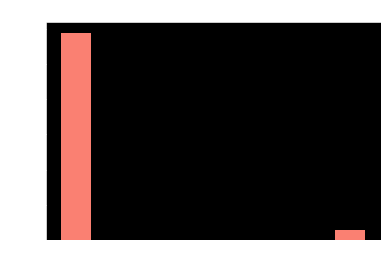

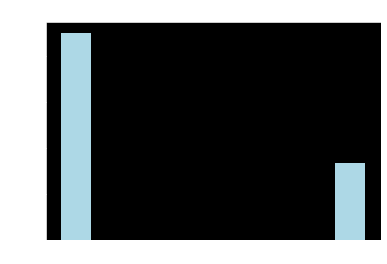

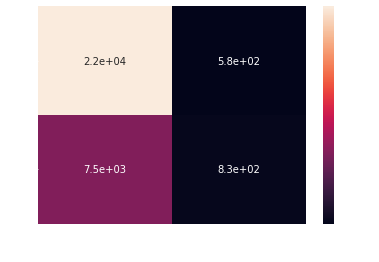

Accuracy:  0.7378031014276927


In [ ]:
# GRAPHS
plt.hist(Y_pred, color = 'salmon')
plt.title("Predicho")
plt.show()
plt.hist(Y_test, color = 'lightblue')
plt.title("Verdadero")
plt.show()
algoritmo.score(X_test, Y_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
import seaborn as sn
from sklearn import metrics
sn.heatmap(confusion_matrix, annot=True)
plt.show()
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))